# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

In [1]:
import pandas as pd
import numpy as np

from seaborn import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.

In [2]:
df = load_dataset('tips')
df['net_bill'] = df['total_bill'] - df['tip']
df['tip_pct'] = df['tip'] / df['net_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [3]:
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', df)

In [5]:
display(X)
display(y)

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [6]:
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.64e-20
Time:                        14:04:13   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Remova as variáveis não significantes.  

In [7]:
#Apenas a variável net_bill se mostrou estatisticamente relevante
y, X = patsy.dmatrices('tip ~ net_bill', df)

In [8]:
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           5.02e-23
Time:                        14:14:19   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. observe o gráfico de resíduos em função de ```net_bill``` 

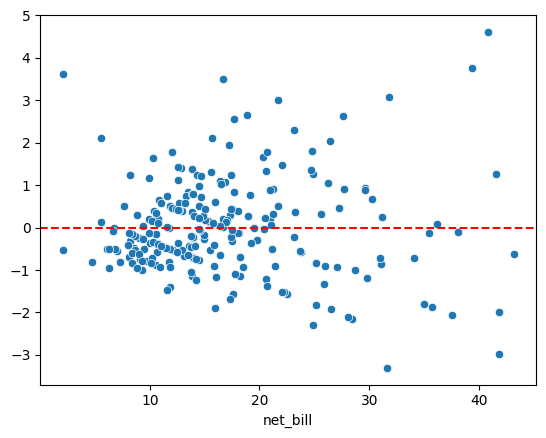

In [10]:
sns.scatterplot(x='net_bill', y=modelo.resid, data=df)
plt.axhline(y=0, color='r', linestyle='--')

4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.96e-22
Time:                        19:48:42   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

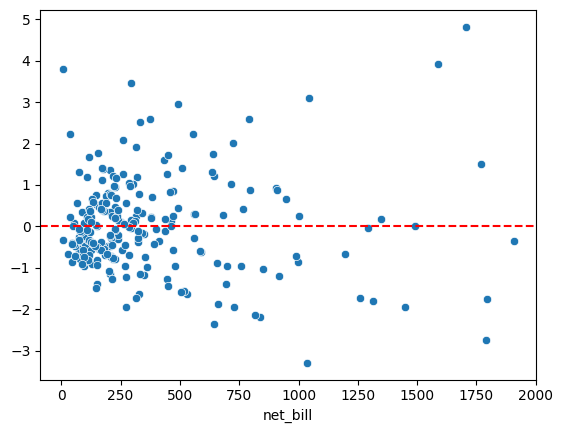

In [13]:
modelo = smf.ols('tip ~ net_bill + np.power(net_bill,2)', data=df).fit()
display(modelo.summary())

sns.scatterplot(x=df['net_bill']+np.power(df['net_bill'],2), y=modelo.resid)
plt.axhline(y=0, color='r', linestyle='--')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           4.40e-20
Time:                        19:49:32   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

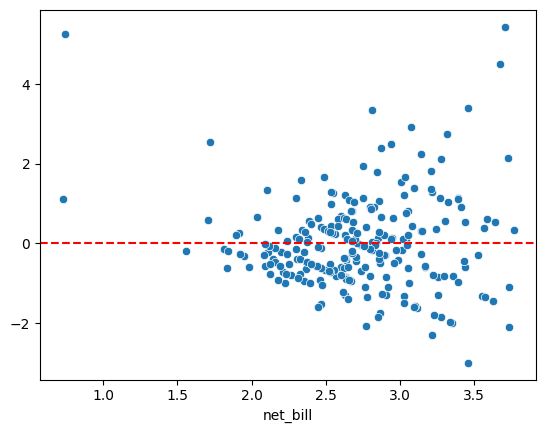

In [14]:
modelo = smf.ols('tip ~ np.log(net_bill)', data=df).fit()
display(modelo.summary())

sns.scatterplot(x=np.log(df['net_bill']), y=modelo.resid)
plt.axhline(y=0, color='r', linestyle='--')

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.

In [15]:
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', df)

2. Remova as variáveis não significantes.

In [16]:
modelo = sm.OLS(y, X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           1.21e-18
Time:                        19:54:24   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
modelo = smf.ols('np.log(tip) ~ net_bill', df).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.60e-21
Time:                        19:56:02   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

3. Observe o gráfico de resíduos em função de ```net_bill```

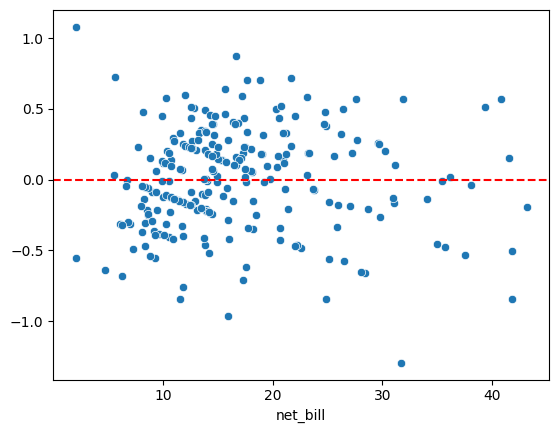

In [19]:
sns.scatterplot(x=df['net_bill'], y=modelo.resid)
plt.axhline(y=0, color='r', linestyle='--')

4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           2.82e-22
Time:                        19:58:25   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

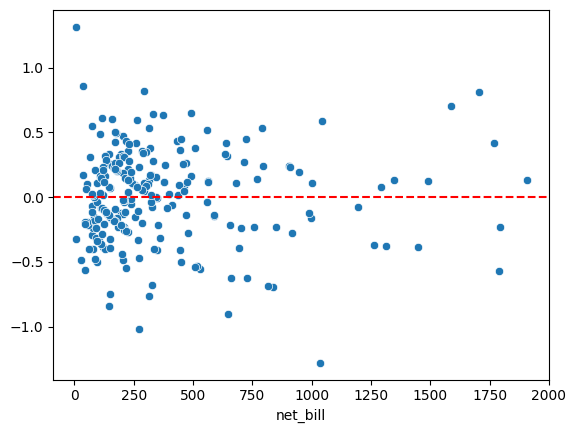

In [22]:
modelo_pol = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill,2)', data=df).fit()
display(modelo_pol.summary())

sns.scatterplot(x=df['net_bill']+np.power(df['net_bill'],2), y=modelo_pol.resid)
plt.axhline(y=0, color='r', linestyle='--')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 29 Jan 2023   Prob (F-statistic):           5.62e-22
Time:                        19:59:13   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

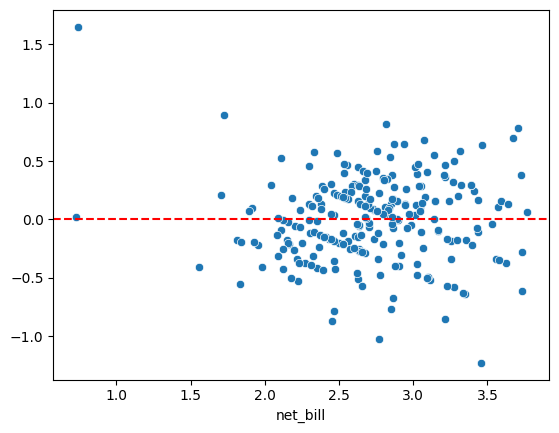

In [24]:
modelo_log = smf.ols('np.log(tip) ~ np.log(net_bill)', data=df).fit()
display(modelo_log.summary())

sns.scatterplot(x=np.log(df['net_bill']), y=modelo_log.resid)
plt.axhline(y=0, color='r', linestyle='--')

5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [29]:
df['pred'] = np.exp(modelo_log.fittedvalues)

df[['pred', 'tip']].corr().iloc[1,0]**2

0.32837743855275564

<div style="background: #EEEEF4; padding: 15px 20px; border-radius: 5px; margin-top: 20px">
    <p style="font-size: 11px; color: #666; font-weight: bold">Resposta</p>
    <p>O melhor modelo foi o do item I, onde o R2 foi de 0.333</p>
</div>

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.

In [48]:
df_renda = pd.read_csv('data/previsao_de_renda.csv')
df_renda = df_renda[df_renda['renda'] <= 20000]

In [49]:
modelo = smf.ols('renda ~ tempo_emprego', df_renda).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     1677.
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:12:21   Log-Likelihood:            -1.1665e+05
No. Observations:               12258   AIC:                         2.333e+05
Df Residuals:                   12256   BIC:                         2.333e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3022.6188     45.535     66.380      0.000    2933.363    3111.875
tempo_emprego   187.2767      4.573     40.954      0.000     178.313     196.240
==============================================================================
Omnibus:                     3724.531   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10540.038
Skew:                           1.614   Prob(JB):                         0.00
Kurtosis:                       6.196   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?

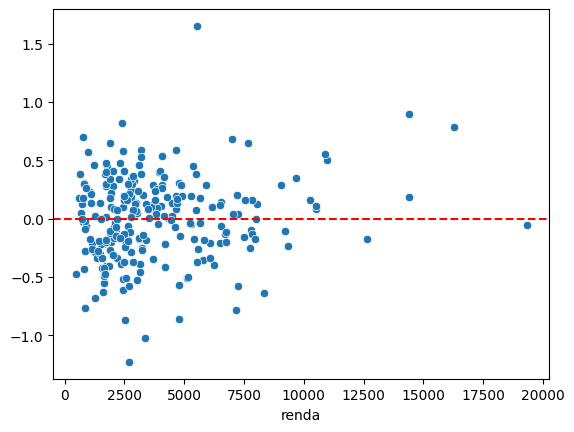

In [50]:
sns.scatterplot(x='renda', y=modelo_log.resid, data=df_renda)
plt.axhline(y=0, color='r', linestyle='--')

3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.

In [45]:
modelo = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + qt_pessoas_residencia', df_renda).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     44.11
Date:                Sun, 29 Jan 2023   Prob (F-statistic):          3.23e-192
Time:                        20:11:57   Log-Likelihood:            -1.2434e+05
No. Observations:               13703   AIC:                         2.487e+05
Df Residuals:                   13679   BIC:                         2.489e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          549.1209    756.487      0.726      0.468    -933.698    2031.940
sexo[T.M]                         1019.6129     43.512     23.433      0.000     934.323    1104.902
posse_de_veiculo[T.True]           -48.8130     40.853     -1.195      0.232    -128.891      31.265
posse_de_imovel[T.True]            160.9953     39.639      4.062      0.000      83.297     238.693
tipo_renda[T.Bolsista]             876.6695   1057.860      0.829      0.407   -1196.881    2950.220
tipo_renda[T.Empresário]           360.6878     46.486      7.759      0.000     269.570     451.806
tipo_renda[T.Pensionista]         -711.1862     63.925    -11.125      0.000    -836.489    -585.884
tipo_renda[T.Servidor público]     467.3087     67.936      6.879      0.000     334.145     600.473
educacao[T.Pós graduação]          761.1906    568.359      1.339      0.181    -352.872    1875.253
educacao[T.Secundário]             316.8311    157.752      2.008      0.045       7.615     626.047
educacao[T.Superior completo]      529.5902    159.558      3.319      0.001     216.835     842.345
educacao[T.Superior incompleto]    227.7525    181.355      1.256      0.209    -127.729     583.234
estado_civil[T.Separado]           211.9277    367.092      0.577      0.564    -507.623     931.478
estado_civil[T.Solteiro]           372.6077    359.332      1.037      0.300    -331.732    1076.947
estado_civil[T.União]             -164.4395     68.802     -2.390      0.017    -299.302     -29.577
estado_civil[T.Viúvo]              244.8954    369.706      0.662      0.508    -479.779     969.570
tipo_residencia[T.Casa]            268.2115    165.439      1.621      0.105     -56.072     592.495
tipo_residencia[T.Com os pais]       5.3075    185.661      0.029      0.977    -358.614     369.229
tipo_residencia[T.Comunitário]     304.8689    320.890      0.950      0.342    -324.120     933.858
tipo_residencia[T.Estúdio]          14.1418    273.561      0.052      0.959    -522.076     550.359
tipo_residencia[T.Governamental]   246.9222    193.979      1.273      0.203    -133.304     627.149
qtd_filhos                        -337.7201    359.156     -0.940      0.347   -1041.714     366.274
idade                               28.4998      2.299     12.398      0.000      23.994      33.006
qt_pessoas_residencia              370.9921    358.277      1.035      0.300    -331.279    1073.263
==============================================================================
Omnibus:                     1352.489   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1787.323
Skew:                           0.876   Prob(JB):                         0.00
Kurtosis:                       3.249   

4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros

In [56]:
modelo = smf.ols('renda ~ posse_de_imovel + tipo_renda + educacao + idade + tempo_emprego', df_renda).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     169.7
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        20:13:22   Log-Likelihood:            -1.1657e+05
No. Observations:               12258   AIC:                         2.332e+05
Df Residuals:                   12246   BIC:                         2.333e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        2553.6874    351.052      7.274      0.000    1865.570    3241.805
posse_de_imovel[T.True]           367.0057     62.267      5.894      0.000     244.953     489.058
tipo_renda[T.Bolsista]           -714.0135   1634.442     -0.437      0.662   -3917.777    2489.750
tipo_renda[T.Empresário]          568.4076     68.777      8.265      0.000     433.594     703.221
tipo_renda[T.Pensionista]        1981.4664   1089.801      1.818      0.069    -154.716    4117.649
tipo_renda[T.Servidor público]    169.5862     99.778      1.700      0.089     -25.993     365.166
educacao[T.Pós graduação]        1749.7953    818.615      2.138      0.033     145.181    3354.410
educacao[T.Secundário]           -425.9144    331.098     -1.286      0.198   -1074.918     223.089
educacao[T.Superior completo]     -66.4528    332.287     -0.200      0.841    -717.788     584.882
educacao[T.Superior incompleto]  -440.1096    356.254     -1.235      0.217   -1138.423     258.204
idade                               8.6017      3.387      2.539      0.011       1.962      15.241
tempo_emprego                     187.0951      4.831     38.726      0.000     177.625     196.565
==============================================================================
Omnibus:                     3707.121   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10516.840
Skew:                           1.605   Prob(JB):                         0.00
Kurtosis:                       6.208   Cond. No.                     2.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

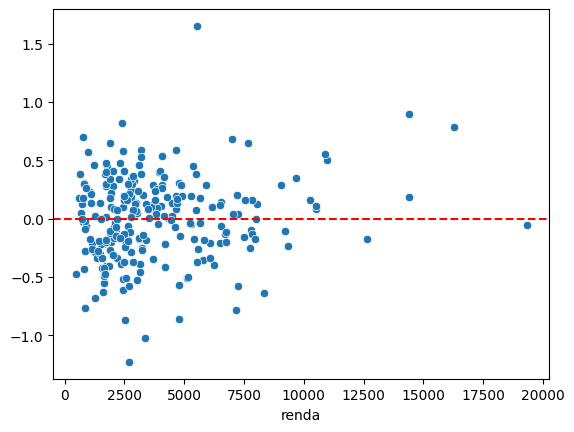

In [57]:
sns.scatterplot(x='renda', y=modelo_log.resid, data=df_renda)
plt.axhline(y=0, color='r', linestyle='--')